# Screened Feasibility UQ

Take the generic DEMO solution, turned into an input file. Remove f-values at iteration vars, and replace their equality constraints with inequalities. Run PROCESS once-through with uncertain inputs, and the QoI as the value of constraints, i.e. the feasibility.

Here, the inputs have already been screened using the single-parameter evaluation method to find the most sensitive inputs.

In [1]:
import easyvvuq as uq
import chaospy as cp
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Campaign to capture feasibility

Using the epistemic uncertain inputs for the entire code, capture the distribution of constraint residuals.

To start with, make just 2 inputs uncertain (for running locally).

In [2]:
# Define campaign
WORK_DIR = "campaigns"
Path("campaigns").mkdir(exist_ok=True)
campaign = uq.Campaign(name="model_inputs", work_dir=WORK_DIR)

# Define parameter space
# Uncertainties from Alex's SA paper

params = {
    "fdene": {
        "type": "float",
        "min": 1.1,
        "max": 1.3,
        "default": 1.2,
    },  # check: not sure if this is right var. I think ok
    "hfact": {"type": "float", "min": 1.0, "max": 1.2, "default": 1.2},
    "coreradius": {"type": "float", "min": 0.45, "max": 0.75, "default": 0.75},  # ok
    "fimp_2": {"type": "float", "min": 0.085, "max": 0.115, "default": 0.1},  # ok
    "fimp_14": {
        "type": "float",
        "min": 1.0e-5,
        "max": 1.0e-4,
        "default": 1.0e-5,
    },  # ok
    "psepbqarmax": {"type": "float", "min": 8.7, "max": 9.7, "default": 9.0}, # ok
    "flhthresh": {"type": "float", "min": 0.85, "max": 1.15, "default": 1.15},  # ok
    "cboot": {
        "type": "float",
        "min": 0.95,
        "max": 1.05,
        "default": 1.0,
    },  # ok
    "peakfactrad": {"type": "float", "min": 2.0, "max": 3.5, "default": 3.33}, # ok
    "kappa": {"type": "float", "min": 1.8, "max": 1.9, "default": 1.848},  # ok
    "etaech": {"type": "float", "min": 0.3, "max": 0.5, "default": 0.4}, # ok
    "feffcd": {"type": "float", "min": 0.5, "max": 5.0, "default": 1.0}, # ok
    "etath": {"type": "float", "min": 0.36, "max": 0.4, "default": 0.375}, # ok
    "etaiso": {"type": "float", "min": 0.75, "max": 0.95, "default": 0.9}, # ok
    "boundl_18": {
        "type": "float",
        "min": 3.25,
        "max": 3.75,
        "default": 3.25,
    },  # q^95_min, ok
    "pinjalw": {"type": "float", "min": 51.0, "max": 61.0, "default": 61.0}, # ok
    "alstroh": {"type": "float", "min": 6.0e8, "max": 7.2e8, "default": 6.6e8}, # ok
    "sig_tf_wp_max": {
        "type": "float",
        "min": 5.2e8,
        "max": 6.4e8,
        "default": 6.4e8,
    },  # ok, but might need sig_tf_case_max to be the same too
    "aspect": {"type": "float", "min": 3.0, "max": 3.2, "default": 3.1},
    "boundu_2": {
        "type": "float",
        "min": 11.0,
        "max": 12.0,
        "default": 12.0,
    },  # B_T^max, ok
    "triang": {"type": "float", "min": 0.4, "max": 0.6, "default": 0.5}, # ok
    "vary_param": {
        "type": "string",
        "default": "",
    },  # param being changed: used for analysis only
}

# QoIs
# Violated constraint residuals
qois = [
    "objf",
    "eq_1",
    "eq_2",
    "eq_11" ,
    "ineq_5",
    "ineq_8",
    "ineq_9",
    "ineq_13",
    "ineq_15",
    "ineq_30",
    "ineq_16",
    "ineq_24",
    "ineq_25",
    "ineq_26",
    "ineq_27",
    "ineq_33",
    "ineq_34",
    "ineq_35" ,
    "ineq_36",
    "ineq_60",
    "ineq_62",
    "ineq_65",
    "ineq_72",
    "ineq_79",
    "ineq_81" ,
    "ineq_68",
    "ineq_31" ,
    "ineq_32",
    "vio_constr_res",
]

# Create encoder and decoder
encoder = uq.encoders.GenericEncoder(
    template_fname="demo_sol_min_rmajor_no_f_IN.template", target_filename="IN.DAT"
)
decoder = uq.decoders.JSONDecoder(
    target_filename="qois.json", output_columns=qois
)

cmd = "process -i IN.DAT"
actions = uq.actions.local_execute(encoder, cmd, decoder)

# Add the app
campaign.add_app(name="feasibility", params=params, actions=actions)

In [3]:
# Create PCE sampler
# Vary all 21 uncertain inputs
vary = {
    # "fdene": cp.Uniform(
    #     1.1,
    #     1.3,
    # ),
    # "hfact": cp.Uniform(
    #     1.0,
    #     1.2,
    # ),
    # "coreradius": cp.Uniform(
    #     0.45,
    #     0.75,
    # ),
    # "fimp_2": cp.Uniform(
    #     0.085,
    #     0.115,
    # ),
    "fimp_14": cp.Uniform(
        1.0e-5,
        1.0e-4,
    ),
    "psepbqarmax": cp.Uniform(
        8.7,
        9.7,
    ),
    # "flhthresh": cp.Uniform(
    #     0.85,
    #     1.15,
    # ),
    # "cboot": cp.Uniform(
    #     0.95,
    #     1.05,
    # ),
    # "peakfactrad": cp.Uniform(
    #     2.0,
    #     3.5,
    # ),
    "kappa": cp.Uniform(
        1.8,
        1.9,
    ),
    # "etaech": cp.Uniform(
    #     0.3,
    #     0.5,
    # ),
    # "feffcd": cp.Uniform(
    #     0.5,
    #     5.0,
    # ),
    # "etath": cp.Uniform(
    #     0.36,
    #     0.4,
    # ),
    # "etaiso": cp.Uniform(
    #     0.75,
    #     0.95,
    # ),
    # "boundl_18": cp.Uniform(
    #     3.25,
    #     3.75,
    # ),
    "pinjalw": cp.Uniform(
        51.0,
        61.0,
    ),
    # "alstroh": cp.Uniform(
    #     6.0e8,
    #     7.2e8,
    # ),
    # "sig_tf_wp_max": cp.Uniform(
    #     5.2e8,
    #     6.4e8,
    # ),
    # "aspect": cp.Uniform(
    #     3.0,
    #     3.2,
    # ),
    # "boundu_2": cp.Uniform(
    #     11.0,
    #     12.0,
    # ),
    # "triang": cp.Uniform(
    #     0.4,
    #     0.6,
    # ),
}
pce_sampler = uq.sampling.PCESampler(vary=vary, polynomial_order=3)

# Add pce_sampler to campaign
campaign.set_sampler(pce_sampler)

# Draw samples, execute and collate
campaign.execute().collate(progress_bar=True)
samples = campaign.get_collation_result()

  0%|          | 0/256 [00:00<?, ?it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:13:49 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
  0%|          | 1/256 [00:02<11:45,  2.77s/it]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023

  1%|          | 2/256 [00:03<06:03,  1.43s/it]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:13:50 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


  1%|          | 3/256 [00:03<04:33,  1.08s/it]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:13:51 +01:00(hh:mm) UTC
      User : jon
  Computer :

  2%|▏         | 5/256 [00:04<02:34,  1.63it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:13:51 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


  2%|▏         | 6/256 [00:05<02:39,  1.57it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 3.61504096e-02, -1.35638819e-02,  4.28035887e-06, -4.05608458e-02,
        1.51149273e-01, -5.54767477e-02,  7.19065997e-01,  6.43825950e-01,
       -1.07301986e-01,  4.00838556e-01,  4.82961982e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  9.57514212e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -6.24016234e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
  3%|▎         | 7/256 [00:05<02:24,  1.73it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 ***************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

  4%|▍         | 10/256 [00:06<01:46,  2.31it/s]

Constraints: constrs = array([ 3.61504096e-02, -1.35638819e-02,  4.28035887e-06, -4.05608458e-02,
        1.51149273e-01, -5.54767477e-02,  7.19065997e-01,  6.43825950e-01,
       -1.45874991e-01,  4.00838556e-01,  4.82961982e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  9.57514212e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -6.24016234e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
Constraints: constrs = array([ 1.31005821e-02, -7.56864965e-02,  4.28035887e-06,  4.62862260e-02,
        1.99401287e-01, -4.45058290e-02,  5.63929372e-01,  6.47425000e-01,
        4.43807985e-01,  2.80904895e-01,  5.82495675e-01,  1.48998829e-01,
        7.13152547e-01,  8.3889

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code *************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
  5%|▍         | 12/256 [00:07<01:48,  2.25it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 1.31005821e-02, -7.56864965e-02,  4.28035887e-06,  4.62862260e-02,
        1.99401287e-01, -4.45058290e-02,  5.63929372e-01,  6.47425000e-01,
        2.93531929e-01,  2.80904895e-01,  5.82495675e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  8.09018080e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -6.33924969e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

  5%|▌         | 14/256 [00:08<01:32,  2.61it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:13:55 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.92518662e-02, -3.29369757e-02,  4.28035887e-06, -1.49909899e-02,
        1.65066697e-01, -5.25898775e-02,  6.71467386e-01,  6.45076433e-01,
        1.20741139e-02,  3.65920890e-01,  5.12696069e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  9.07805563e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -6.16171665e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
  6%|▋         | 16/256 [00:10<02:24,  1.66it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 *************************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

  7%|▋         | 19/256 [00:11<01:53,  2.09it/s]

The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 3.61504096e-02, -1.35638819e-02,  4.28035887e-06, -4.05608458e-02,
        1.51149273e-01, -5.54767477e-02,  7.19065997e-01,  6.43825950e-01,
       -1.45874991e-01,  4.00838556e-01,  4.82961982e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  9.57514212e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -6.12844135e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **********************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
  8%|▊         | 20/256 [00:12<02:28,  1.59it/s]

Constraints: constrs = array([ 2.92518662e-02, -3.29369757e-02,  4.28035887e-06, -1.49909899e-02,
        1.65066697e-01, -5.25898775e-02,  6.71467386e-01,  6.45076433e-01,
        1.29651811e-01,  3.65920890e-01,  5.12696069e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  9.07805563e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -6.16171665e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

  9%|▉         | 23/256 [00:13<01:55,  2.01it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
Constraints: constrs = array([ 2.92518662e-02, -3.29369757e-02,  4.28035887e-06, -1.49909899e-02,
        1.65066697e-01, -5.25898775e-02,  6.71467386e-01,  6.45076433e-01,
        7.54415933e-02,  3.65920890e-01,  5.12696069e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  9.07805563e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -6.16171665e-01,  9.63201551e-06,  1.380

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.01514764e-02, -5.74540007e-02,  4.28035887e-06,  1.92896372e-02,
        1.84107293e-01, -4.82615951e-02,  6.10208559

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:01 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

  9%|▉         | 24/256 [00:14<02:12,  1.75it/s]

Constraints: constrs = array([ 2.01514764e-02, -5.74540007e-02,  4.28035887e-06,  1.92896372e-02,
        1.84107293e-01, -4.82615951e-02,  6.10208559e-01,  6.46495320e-01,
        1.70324886e-01,  3.18568799e-01,  5.51993830e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  8.49151714e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -6.20196499e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 11%|█         | 27/256 [00:15<01:34,  2.43it/s]

Constraints: constrs = array([ 2.01514764e-02, -5.74540007e-02,  4.28035887e-06,  1.92896372e-02,
        1.84107293e-01, -4.82615951e-02,  6.10208559e-01,  6.46495320e-01,
        1.19755772e-01,  3.18568799e-01,  5.51993830e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  8.49151714e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -6.20196499e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

 11%|█         | 28/256 [00:16<02:26,  1.56it/s]

Constraints: constrs = array([ 1.31005821e-02, -7.56864965e-02,  4.28035887e-06,  4.62862260e-02,
        1.99401287e-01, -4.45058290e-02,  5.63929372e-01,  6.47425000e-01,
        2.93531929e-01,  2.80904895e-01,  5.82495675e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  8.09018080e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -6.23047302e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCE

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:04 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.61504096e-02, -1.35638819e-02,  4.28035887e-06, -4.05608458e-02,
        1.51149273e-01, -5.54767477e-02,  7.19065997e-01,  6.43825950e-01,
       -5.14088232e-02,  4.00838556e-01,  4.82961982e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  9.57514212e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -5.98267666e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

 11%|█▏        | 29/256 [00:17<02:54,  1.30it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.


 12%|█▏        | 30/256 [00:18<02:36,  1.44it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:05 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

 12%|█▏        | 31/256 [00:18<02:14,  1.68it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 12%|█▎        | 32/256 [00:18<01:56,  1.92it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 13%|█▎        | 33/256 [00:19<02:10,  1.71it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in I

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 13%|█▎        | 34/256 [00:20<02:12,  1.68it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:07 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 14%|█▍        | 36/256 [00:21<01:51,  1.97it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:08 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 14%|█▍        | 37/256 [00:21<01:49,  2.00it/s]

Constraints: constrs = array([ 2.92518662e-02, -3.29369757e-02,  4.28035887e-06, -1.49909899e-02,
        1.65066697e-01, -5.25898775e-02,  6.71467386e-01,  6.45076433e-01,
       -3.16570688e-02,  3.65920890e-01,  5.12696069e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  9.07805563e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -6.01720478e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
Constraints: constrs = array([ 2.92518662e-02, -3.29369757e-02,  4.28035887e-06, -1.49909899e-02,
        1.65066697e-01, -5.25898775e-02,  6.71467386e-01,  6.45076433e-01,
        1.20741139e-02,  3.65920890e-01,  5.12696069e-01,  1.48998829e-01,
        6.96034874e-01,  8.4360

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 15%|█▍        | 38/256 [00:22<01:55,  1.89it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in I

 16%|█▌        | 40/256 [00:23<01:44,  2.07it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:10 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 16%|█▌        | 41/256 [00:24<02:13,  1.61it/s]

Constraints: constrs = array([ 2.01514764e-02, -5.74540007e-02,  4.28035887e-06,  1.92896372e-02,
        1.84107293e-01, -4.82615951e-02,  6.10208559e-01,  6.46495320e-01,
        2.43600684e-01,  3.18568799e-01,  5.51993830e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  8.49151714e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -6.05896847e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCE

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.


 16%|█▋        | 42/256 [00:25<02:42,  1.32it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:12 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.


 17%|█▋        | 43/256 [00:25<02:26,  1.45it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:13 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

 17%|█▋        | 44/256 [00:25<01:58,  1.79it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 1.31005821e-02, -7.56864965e-02,  4.28035887e-06,  4.62862260e-02,
        1.99401287e-01, -4.45058290e-02,  5.63929372e-01,  6.47425000e-01,
        3.74521905e-01,  2.80904895e-01,  5.82495675e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  8.09018080e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -6.08854983e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 *******************************************************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:13 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 18%|█▊        | 45/256 [00:26<01:59,  1.77it/s]

The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

 18%|█▊        | 47/256 [00:27<01:49,  1.91it/s]

Constraints: constrs = array([ 1.31005821e-02, -7.56864965e-02,  4.28035887e-06,  4.62862260e-02,
        1.99401287e-01, -4.45058290e-02,  5.63929372e-01,  6.47425000e-01,
        2.93531929e-01,  2.80904895e-01,  5.82495675e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  8.09018080e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -6.08854983e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
Constraints: constrs = array([ 3.61504096e-02, -1.35638819e-02,  4.28035887e-06, -4.05608458e-02,
        1.51149273e-01, -5.54767477e-02,  7.19065997e-01,  6.43825950e-01,
       -5.14088232e-02,  4.00838556e-01,  4.82961982e-01,  1.48998829e-01,
        6.89056343e-01,  8.4587

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.31005821e-02, -7.56864965e-02,  4.28035887e-06,  4.62862260e-02,
        1.99401287e-01, -4.45058290e-02,  5.63929372

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 19%|█▉        | 48/256 [00:28<02:15,  1.54it/s]

Constraints: constrs = array([ 2.92518662e-02, -3.29369757e-02,  4.28035887e-06, -1.49909899e-02,
        1.65066697e-01, -5.25898775e-02,  6.71467386e-01,  6.45076433e-01,
        1.29651811e-01,  3.65920890e-01,  5.12696069e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  9.07805563e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -5.90644401e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 20%|█▉        | 50/256 [00:28<01:34,  2.18it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:16 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

 20%|█▉        | 51/256 [00:29<01:41,  2.03it/s]

Constraints: constrs = array([ 2.92518662e-02, -3.29369757e-02,  4.28035887e-06, -1.49909899e-02,
        1.65066697e-01, -5.25898775e-02,  6.71467386e-01,  6.45076433e-01,
        7.54415933e-02,  3.65920890e-01,  5.12696069e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  9.07805563e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -5.90644401e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 20%|██        | 52/256 [00:29<01:37,  2.10it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
Constraints: constrs = array([ 3.61504096e-02, -1.35638819e-02,  4.28035887e-06, -4.05608458e-02,
        1.51149273e-01, -5.54767477e-02,  7.19065997e-01,  6.43825950e-01,
       -1.07301986e-01,  4.00838556e-01,  4.82961982e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  9.57514212e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -5.87095567e-01,  9.63201551e-06,  1.38006583e-01])
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs has been ignored.
 
 ******************************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.01514764e-02, -5.74540007e-02,  4.28035887e-06,  1.92896372e-02,
        1.84107293e-01, -4.82615951e-02,  6.10208559

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 22%|██▏       | 56/256 [00:31<01:16,  2.63it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:19 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 22%|██▏       | 57/256 [00:33<02:06,  1.58it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 2.01514764e-02, -5.74540007e-02,  4.28035887e-06,  1.92896372e-02,
        1.84107293e-01, -4.82615951e-02,  6.10208559e-01,  6.46495320e-01,
        3.06287365e-01,  3.18568799e-01,  5.51993830e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  8.49151714e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.94936914e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and doe

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 3.49032414e-02, -6.49796351e-03,  4.28035887e-06, -4.05608458e-02,
        1.55081274e-01, -5.22505233e-02,  6.57684462e-01,  6.01989707e-01,
        1.02281193e-02,  3.86584309e-01,  4.81890043e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  7.69188201e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -5.79064655e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCE

 23%|██▎       | 58/256 [00:34<02:49,  1.17it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:21 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 23%|██▎       | 59/256 [00:35<02:37,  1.25it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.31005821e-02, -7.56864965e-02,  4.28035887e-06,  4.62862260e-02,
        1.99401287e-01, -4.45058290e-02,  5.63929372e-01,  6.47425000e-01,
        2.93531929e-01,  2.80904895e-01,  5.82495675e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  8.09018080e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.97977315e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 23%|██▎       | 60/256 [00:35<02:02,  1.60it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 ***************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 24%|██▍       | 61/256 [00:35<01:53,  1.72it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.31005821e-02, -7.56864965e-02,  4.28035887e-06,  4.62862260e-02,
        1.99401287e-01, -4.45058290e-02,  5.63929372e-01,  6.47425000e-01,
        2.37639105e-01,  2.80904895e-01,  5.82495675e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  8.09018080e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.97977315e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 24%|██▍       | 62/256 [00:36<01:50,  1.76it/s]

The IN.DAT file does not contain any obsolete variables. 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

 25%|██▌       | 65/256 [00:37<01:26,  2.21it/s]

Constraints: constrs = array([ 3.49032414e-02, -6.49796351e-03,  4.28035887e-06, -4.05608458e-02,
        1.55081274e-01, -5.22505233e-02,  6.57684462e-01,  6.01989707e-01,
       -1.34027628e-01,  3.86584309e-01,  4.81890043e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  7.69188201e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -5.79064655e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 26%|██▌       | 66/256 [00:38<01:34,  2.02it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:27 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 27%|██▋       | 68/256 [00:40<02:13,  1.41it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 27%|██▋       | 69/256 [00:40<01:48,  1.72it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 1.89278904e-02, -4.96926375e-02,  4.28035887e-06,  1.92896372e-02,
        1.88151865e-01, -4.50107284e-02,  5.52710786e-01,  6.04118169e-01,
        3.19596974e-01,  3.04308309e-01,  5.50903422e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  6.67797359e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.86165314e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **********************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 28%|██▊       | 71/256 [00:40<01:13,  2.53it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.89278904e-02, -4.96926375e-02,  4.28035887e-06,  1.92896372e-02,
        1.88151865e-01, -4.50107284e-02,  5.52710786e-01,  6.04118169e-01,
        1.31164833e-01,  3.04308309e-01,  5.50903422e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  6.67797359e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.86165314e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 2.80148737e-02, -2.55581398e-02,  4.28035887e-06, -1.49909899e-02,
        1.69046234e-01, -4.93537935e-02,  6.11784051e-01,  6.03036648e-01,
        1.43252666e-01,  3.51663153e-01,  5.11615896e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  7.22572079e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -5.82313794e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 29%|██▉       | 74/256 [00:41<01:05,  2.78it/s]

The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 1.18873697e-02, -6.76507969e-02,  4.28035887e-06,  4.62862260e-02,
        2.03498098e-01, -4.12421348e-02,  5.08082725e-01,  6.04733537e-01,
        4.56891236e-01,  2.66643558e-01,  5.81397825e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  6.30522109e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.88828663e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.89278904e-02, -4.96926375e-02,  4.28035887e-06,  1.92896372e-02,
        1.88151865e-01, -4.50107284e-02,  5.52710786e-01,  6.04118169e-01,
        2.56271586e-01,  3.04308309e-01,  5.50903422e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  6.67797359e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.86165314e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 29%|██▉       | 75/256 [00:44<02:55,  1.03it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:31 +01:00(hh:mm) UTC
      User : jon
  Computer :

 30%|███       | 78/256 [00:44<01:37,  1.83it/s]

Constraints: constrs = array([ 1.18873697e-02, -6.76507969e-02,  4.28035887e-06,  4.62862260e-02,
        2.03498098e-01, -4.12421348e-02,  5.08082725e-01,  6.04733537e-01,
        2.48854130e-01,  2.66643558e-01,  5.81397825e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  6.30522109e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.88828663e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 31%|███▏      | 80/256 [00:45<01:31,  1.93it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:33 +01:00(hh:mm) UTC
      User : jon
  Computer :

 32%|███▏      | 81/256 [00:46<01:38,  1.77it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:34 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 32%|███▏      | 82/256 [00:48<02:20,  1.24it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:35 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

 33%|███▎      | 84/256 [00:48<01:33,  1.84it/s]

Constraints: constrs = array([ 3.49032414e-02, -6.49796351e-03,  4.28035887e-06, -4.05608458e-02,
        1.55081274e-01, -5.22505233e-02,  6.57684462e-01,  6.01989707e-01,
       -3.82511429e-02,  3.86584309e-01,  4.81890043e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  7.69188201e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -5.66556851e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **********************

 34%|███▎      | 86/256 [00:49<01:20,  2.11it/s]

Constraints: constrs = array([ 2.80148737e-02, -2.55581398e-02,  4.28035887e-06, -1.49909899e-02,
        1.69046234e-01, -4.93537935e-02,  6.11784051e-01,  6.03036648e-01,
        8.83897648e-02,  3.51663153e-01,  5.11615896e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  7.22572079e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -5.69902536e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables. tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 **************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
Constraints: constrs = array([ 1.18873697e-02, -6.76507969e-02,  4.28035887e-06,  4.62862260e-02,
        2.03498098e-01, -4.12421348e-02,  5.08082725e-01,  6.04733537e-01,
        3.86977311e-01,  2.66643558e-01,  5.81397825e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  6.30522109e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.76610989e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 34%|███▍      | 88/256 [00:51<01:52,  1.49it/s]

Constraints: constrs = array([ 1.18873697e-02, -6.76507969e-02,  4.28035887e-06,  4.62862260e-02,
        2.03498098e-01, -4.12421348e-02,  5.08082725e-01,  6.04733537e-01,
        4.56891236e-01,  2.66643558e-01,  5.81397825e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  6.30522109e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.76610989e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
Constraints: constrs = array([ 2.80148737e-02, -2.55581398e-02,  4.28035887e-06, -1.49909899e-02,
        1.69046234e-01, -4.93537935e-02,  6.11784051e-01,  6.03036648e-01,
        2.42593496e-02,  3.51663153e-01,  5.11615896e-01,  1.48998829e-01,
        6.96034874e-01,  8.4360

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning me

 36%|███▌      | 91/256 [00:52<01:16,  2.14it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:39 +01:00(hh:mm) UTC
      User : jon
  Computer :

 36%|███▋      | 93/256 [00:52<00:59,  2.73it/s]

Constraints: constrs = array([ 1.18873697e-02, -6.76507969e-02,  4.28035887e-06,  4.62862260e-02,
        2.03498098e-01, -4.12421348e-02,  5.08082725e-01,  6.04733537e-01,
        3.05253435e-01,  2.66643558e-01,  5.81397825e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  6.30522109e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.76610989e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 37%|███▋      | 95/256 [00:53<00:57,  2.82it/s]

The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 38%|███▊      | 96/256 [00:56<02:17,  1.17it/s]

Constraints: constrs = array([ 3.49032414e-02, -6.49796351e-03,  4.28035887e-06, -4.05608458e-02,
        1.55081274e-01, -5.22505233e-02,  6.57684462e-01,  6.01989707e-01,
       -1.34027628e-01,  3.86584309e-01,  4.81890043e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  7.69188201e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -5.50237659e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00


 38%|███▊      | 97/256 [00:56<01:49,  1.45it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 *************************************

 38%|███▊      | 98/256 [00:56<01:24,  1.86it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:43 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

 39%|███▊      | 99/256 [00:56<01:14,  2.10it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 1.89278904e-02, -4.96926375e-02,  4.28035887e-06,  1.92896372e-02,
        1.88151865e-01, -4.50107284e-02,  5.52710786e-01,  6.04118169e-01,
        2.56271586e-01,  3.04308309e-01,  5.50903422e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  6.67797359e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.57824594e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 39%|███▉      | 100/256 [00:57<01:12,  2.14it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:44 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 3.49032414e-02, -6.49796351e-03,  4.28035887e-06, -4.05608458e-02,
        1.55081274e-01, -5.22505233e-02,  6.57684462e-01,  6.01989707e-01,
       -9.49195861e-02,  3.86584309e-01,  4.81890043e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  7.69188201e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -5.50237659e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 40%|████      | 103/256 [00:58<01:17,  1.98it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:46 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 41%|████      | 105/256 [01:00<01:15,  2.00it/s]

Constraints: constrs = array([ 1.89278904e-02, -4.96926375e-02,  4.28035887e-06,  1.92896372e-02,
        1.88151865e-01, -4.50107284e-02,  5.52710786e-01,  6.04118169e-01,
        3.19596974e-01,  3.04308309e-01,  5.50903422e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  6.67797359e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.57824594e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.80148737e-02, -2.55581398e-02,  4.28035887e-06, -1.49909899e-02,
        1.69046234e-01, -4.93537935e-02,  6.11784051e-01,  6.03036648e-01,
       -1.99983507e-02,  3.51663153e-01,  5.11615896e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  7.22572079e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -5.53709310e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 41%|████▏     | 106/256 [01:01<01:41,  1.47it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:48 +01:00(hh:mm) UTC
      User : jon
  Computer :

 42%|████▏     | 108/256 [01:01<01:10,  2.09it/s]

Constraints: constrs = array([ 1.18873697e-02, -6.76507969e-02,  4.28035887e-06,  4.62862260e-02,
        2.03498098e-01, -4.12421348e-02,  5.08082725e-01,  6.04733537e-01,
        3.05253435e-01,  2.66643558e-01,  5.81397825e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  6.30522109e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.60670338e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.89278904e-02, -4.96926375e-02,  4.28035887e-06,  1.92896372e-02,
        1.88151865e-01, -4.50107284e-02,  5.52710786e-01,  6.04118169e-01,
        1.31164833e-01,  3.04308309e-01,  5.50903422e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  6.67797359e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.57824594e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:50 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 43%|████▎     | 109/256 [01:03<01:47,  1.37it/s]

Constraints: constrs = array([ 2.80148737e-02, -2.55581398e-02,  4.28035887e-06, -1.49909899e-02,
        1.69046234e-01, -4.93537935e-02,  6.11784051e-01,  6.03036648e-01,
        1.43252666e-01,  3.51663153e-01,  5.11615896e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  7.22572079e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -5.41298051e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 43%|████▎     | 110/256 [01:03<01:35,  1.53it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.18873697e-02, -6.76507969e-02,  4.28035887e-06,  4.62862260e-02,
        2.03498098e-01, -4.12421348e-02,  5.08082725e-01,  6.04733537e-01,
        2.48854130e-01,  2.66643558e-01,  5.81397825e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  6.30522109e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.60670338e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 44%|████▍     | 112/256 [01:04<01:10,  2.03it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:51 +01:00(hh:mm) UTC
      User : jon
  Computer :

 44%|████▍     | 113/256 [01:04<01:05,  2.18it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.49032414e-02, -6.49796351e-03,  4.28035887e-06, -4.05608458e-02,
        1.55081274e-01, -5.22505233e-02,  6.57684462e-01,  6.01989707e-01,
       -1.34027628e-01,  3.86584309e-01,  4.81890043e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  7.69188201e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -5.37729855e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

 45%|████▍     | 114/256 [01:05<01:12,  1.97it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:53 +01:00(hh:mm) UTC
      User : jon
  Computer :

 45%|████▌     | 116/256 [01:05<01:01,  2.28it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:53 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 2.80148737e-02, -2.55581398e-02,  4.28035887e-06, -1.49909899e-02,
        1.69046234e-01, -4.93537935e-02,  6.11784051e-01,  6.03036648e-01,
        2.42593496e-02,  3.51663153e-01,  5.11615896e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  7.22572079e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -5.41298051e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCE

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 46%|████▋     | 119/256 [01:08<01:15,  1.81it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 1.89278904e-02, -4.96926375e-02,  4.28035887e-06,  1.92896372e-02,
        1.88151865e-01, -4.50107284e-02,  5.52710786e-01,  6.04118169e-01,
        1.31164833e-01,  3.04308309e-01,  5.50903422e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  6.67797359e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.45527781e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 47%|████▋     | 120/256 [01:08<01:10,  1.93it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:56 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

 47%|████▋     | 121/256 [01:09<01:09,  1.93it/s]

Constraints: constrs = array([ 1.18873697e-02, -6.76507969e-02,  4.28035887e-06,  4.62862260e-02,
        2.03498098e-01, -4.12421348e-02,  5.08082725e-01,  6.04733537e-01,
        3.86977311e-01,  2.66643558e-01,  5.81397825e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  6.30522109e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.48452664e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 1.89278904e-02, -4.96926375e-02,  4.28035887e-06,  1.92896372e-02,
        1.88151865e-01, -4.50107284e-02,  5.52710786e-01,  6.04118169e-01,
        1.82249190e-01,  3.04308309e-01,  5.50903422e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  6.67797359e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.45527781e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ********

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 48%|████▊     | 122/256 [01:10<01:22,  1.63it/s]

Constraints: constrs = array([ 1.89278904e-02, -4.96926375e-02,  4.28035887e-06,  1.92896372e-02,
        1.88151865e-01, -4.50107284e-02,  5.52710786e-01,  6.04118169e-01,
        2.56271586e-01,  3.04308309e-01,  5.50903422e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  6.67797359e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.45527781e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 

 48%|████▊     | 123/256 [01:10<01:14,  1.80it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:58 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 48%|████▊     | 124/256 [01:11<01:23,  1.57it/s]

Constraints: constrs = array([ 1.18873697e-02, -6.76507969e-02,  4.28035887e-06,  4.62862260e-02,
        2.03498098e-01, -4.12421348e-02,  5.08082725e-01,  6.04733537e-01,
        3.05253435e-01,  2.66643558e-01,  5.81397825e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  6.30522109e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.48452664e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 49%|████▉     | 126/256 [01:11<00:53,  2.45it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:14:59 +01:00(hh:mm) UTC
      User : jon
  Computer :

 50%|████▉     | 127/256 [01:12<01:04,  2.01it/s]

Constraints: constrs = array([ 1.18873697e-02, -6.76507969e-02,  4.28035887e-06,  4.62862260e-02,
        2.03498098e-01, -4.12421348e-02,  5.08082725e-01,  6.04733537e-01,
        2.48854130e-01,  2.66643558e-01,  5.81397825e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  6.30522109e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.48452664e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 *************************************************

 50%|█████     | 129/256 [01:13<01:13,  1.72it/s]

Constraints: constrs = array([ 3.32784287e-02,  2.57022360e-03,  4.28035887e-06, -4.05608458e-02,
        1.60241799e-01, -4.80162888e-02,  5.83890986e-01,  5.29546387e-01,
        2.77877243e-02,  3.68107951e-01,  4.80497950e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  5.17837758e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -5.01228414e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 51%|█████     | 131/256 [01:14<00:56,  2.20it/s]

The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 52%|█████▏    | 132/256 [01:15<01:25,  1.45it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:03 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

 52%|█████▏    | 133/256 [01:17<01:38,  1.24it/s]

 
 **************************************************************************************************************
 
   Equality constraints : 03
 Inequality constraints : 24
      Total constraints : 27
    Iteration variables : 24
         Max iterations : 200
       Figure of merit  : +01  -- minimise major radius.
  Convergence parameter : 1.00E-07
 
 **************************************************************************************************************
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7/runs/runs_0-100000000/runs_0-1000000/runs_0-10000/runs_100-200/run_140/IN.DAT
This is longer than 110 columns.
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.73337884e-02, -3.96954304e-02,  4.28035887e-06,  1.92896372e-02,
        1.93460135e-01, -4.07441524e-02,  4.83586406e-01,  5.30307295e-01,
        1.45671378e-01,  2.85816940e-01,  5.49487276e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  4.25834483e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -5.07803025e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 52%|█████▏    | 134/256 [01:18<01:41,  1.21it/s]

The IN.DAT file does not contain any obsolete variables.The IN.DAT file does not contain any obsolete variables.

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

 54%|█████▎    | 137/256 [01:18<00:57,  2.07it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:05 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

 54%|█████▍    | 138/256 [01:20<01:21,  1.46it/s]

Constraints: constrs = array([ 1.03067774e-02, -5.72870425e-02,  4.28035887e-06,  4.62862260e-02,
        2.08874927e-01, -3.69587236e-02,  4.40943344e-01,  5.30156782e-01,
        4.73532555e-01,  2.48148029e-01,  5.79971986e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  3.92407954e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -5.10052401e-01,  9.63201551e-06,  1.38006583e-01])
Constraints: constrs = array([ 1.03067774e-02, -5.72870425e-02,  4.28035887e-06,  4.62862260e-02,
        2.08874927e-01, -3.69587236e-02,  4.40943344e-01,  5.30156782e-01,
        3.20162673e-01,  2.48148029e-01,  5.79971986e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  3.92407954e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 55%|█████▌    | 141/256 [01:20<00:44,  2.57it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.03067774e-02, -5.72870425e-02,  4.28035887e-06,  4.62862260e-02,
        2.08874927e-01, -3.69587236e-02,  4.40943344

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 56%|█████▋    | 144/256 [01:21<00:39,  2.83it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:09 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 57%|█████▋    | 145/256 [01:22<00:56,  1.98it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:09 +01:00(hh:mm) UTC
      User : jon
  Computer :

 57%|█████▋    | 147/256 [01:24<01:18,  1.38it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:12 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 58%|█████▊    | 148/256 [01:25<01:28,  1.22it/s]

Constraints: constrs = array([ 1.73337884e-02, -3.96954304e-02,  4.28035887e-06,  1.92896372e-02,
        1.93460135e-01, -4.07441524e-02,  4.83586406e-01,  5.30307295e-01,
        1.97410862e-01,  2.85816940e-01,  5.49487276e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  4.25834483e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -4.93177731e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
Constraints: constrs = array([ 1.73337884e-02, -3.96954304e-02,  4.28035887e-06,  1.92896372e-02,
        1.93460135e-01, -4.07441524e-02,  4.83586406e-01,  5.30307295e-01,
        1.45671378e-01,  2.85816940e-01,  5.49487276e-01,  1.48998829e-01,
        7.05550296e-01,  8.4085

 58%|█████▊    | 149/256 [01:26<01:10,  1.52it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 2.64033128e-02, -1.60719637e-02,  4.28035887e-06, -1.49909899e-02,
        1.74269148e-01, -4.51066189e-02,  5.40032167e-01,  5.30066760e-01,
        3.97458404e-02,  3.33179295e-01,  5.10213081e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  4.75385928e-02,
        3.83928951e-

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:14 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 59%|█████▊    | 150/256 [01:27<01:18,  1.36it/s]

Constraints: constrs = array([ 1.73337884e-02, -3.96954304e-02,  4.28035887e-06,  1.92896372e-02,
        1.93460135e-01, -4.07441524e-02,  4.83586406e-01,  5.30307295e-01,
        3.36520054e-01,  2.85816940e-01,  5.49487276e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  4.25834483e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -4.93177731e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 59%|█████▉    | 151/256 [01:27<01:08,  1.53it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 60%|██████    | 154/256 [01:27<00:33,  3.03it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:15 +01:00(hh:mm) UTC
      User : jon
  Computer :

 61%|██████    | 156/256 [01:28<00:36,  2.76it/s]

Constraints: constrs = array([ 1.03067774e-02, -5.72870425e-02,  4.28035887e-06,  4.62862260e-02,
        2.08874927e-01, -3.69587236e-02,  4.40943344e-01,  5.30156782e-01,
        4.73532555e-01,  2.48148029e-01,  5.79971986e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  3.92407954e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -4.95493945e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 61%|██████▏   | 157/256 [01:29<00:53,  1.85it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:17 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.The IN.DAT file does not contain any obsolete variables.

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023

 62%|██████▏   | 158/256 [01:30<01:09,  1.42it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:18 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.64033128e-02, -1.60719637e-02,  4.28035887e-06, -1.49909899e-02,
        1.74269148e-01, -4.51066189e-02,  5.40032167e-01,  5.30066760e-01,
        1.04845888e-01,  3.33179295e-01,  5.10213081e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  4.75385928e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -4.70376333e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

 62%|██████▏   | 159/256 [01:33<01:51,  1.15s/it]

The IN.DAT file does not contain any obsolete variables.The IN.DAT file does not contain any obsolete variables.

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023

 62%|██████▎   | 160/256 [01:33<01:23,  1.15it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:20 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 63%|██████▎   | 162/256 [01:33<00:56,  1.66it/s]

Constraints: constrs = array([ 1.73337884e-02, -3.96954304e-02,  4.28035887e-06,  1.92896372e-02,
        1.93460135e-01, -4.07441524e-02,  4.83586406e-01,  5.30307295e-01,
        3.36520054e-01,  2.85816940e-01,  5.49487276e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  4.25834483e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -4.74095806e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 64%|██████▍   | 164/256 [01:34<00:45,  2.04it/s]

Constraints: constrs = array([ 2.64033128e-02, -1.60719637e-02,  4.28035887e-06, -1.49909899e-02,
        1.74269148e-01, -4.51066189e-02,  5.40032167e-01,  5.30066760e-01,
        3.97458404e-02,  3.33179295e-01,  5.10213081e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  4.75385928e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -4.70376333e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 64%|██████▍   | 165/256 [01:34<00:40,  2.25it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.32784287e-02,  2.57022360e-03,  4.28035887e-06, -4.05608458e-02,
        1.60241799e-01, -4.80162888e-02,  5.83890986e-01,  5.29546387e-01,
       -1.18975451e-01,  3.68107951e-01,  4.80497950e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  5.17837758e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -4.67070944e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

 65%|██████▌   | 167/256 [01:35<00:34,  2.57it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 66%|██████▌   | 169/256 [01:36<00:31,  2.77it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:23 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

 66%|██████▋   | 170/256 [01:38<01:16,  1.12it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.32784287e-02,  2.57022360e-03,  4.28035887e-06, -4.05608458e-02,
        1.60241799e-01, -4.80162888e-02,  5.83890986e-01,  5.29546387e-01,
        2.77877243e-02,  3.68107951e-01,  4.80497950e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  5.17837758e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -4.52250289e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 67%|██████▋   | 171/256 [01:39<01:22,  1.04it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
Constraints: constrs = array([ 1.03067774e-02, -5.72870425e-02,  4.28035887e-06,  4.62862260e-02,
        2.08874927e-01, -3.69587236e-02,  4.40943344e-01,  5.30156782e-01,
        4.73532555e-01,  2.48148029e-01,  5.79971986e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  3.92

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 68%|██████▊   | 173/256 [01:40<00:48,  1.72it/s]

The IN.DAT file does not contain any obsolete variables.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

 68%|██████▊   | 174/256 [01:40<00:48,  1.68it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:28 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

 68%|██████▊   | 175/256 [01:41<00:40,  2.01it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:29 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.03067774e-02, -5.72870425e-02,  4.28035887e-06,  4.62862260e-02,
        2.08874927e-01, -3.69587236e-02,  4.40943344e-01,  5.30156782e-01,
        3.20162673e-01,  2.48148029e-01,  5.79971986e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  3.92407954e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -4.76499226e-01,  9.63201551e-06,  1.38006583e-01])The IN.DAT file does not contain any obsolet

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 3.32784287e-02,  2.57022360e-03,  4.28035887e-06, -4.05608458e-02,
        1.60241799e-01, -4.80162888e-02,  5.83890986e-01,  5.29546387e-01,
       -7.91876397e-02,  3.68107951e-01,  4.80497950e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  5.17837758e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -4.52250289e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00


 69%|██████▉   | 177/256 [01:42<00:55,  1.43it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:30 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

 70%|██████▉   | 178/256 [01:43<00:43,  1.79it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:30 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 71%|███████   | 181/256 [01:44<00:30,  2.46it/s]

Constraints: constrs = array([ 2.64033128e-02, -1.60719637e-02,  4.28035887e-06, -1.49909899e-02,
        1.74269148e-01, -4.51066189e-02,  5.40032167e-01,  5.30066760e-01,
        1.04845888e-01,  3.33179295e-01,  5.10213081e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  4.75385928e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -4.55647601e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 *************************************

 71%|███████   | 182/256 [01:45<00:51,  1.45it/s]

The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
Constraints: constrs = array([ 1.73337884e-02, -3.96954304e-02,  4.28035887e-06,  1.92896372e-02,
        1.93460135e-01, -4.07441524e-02,  4.83586406e-01,  5.30307295e-01,
        1.45671378e-01,  2.85816940e-01,  5.49487276e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  4.25834483e-02,
        3.83928951

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 71%|███████▏  | 183/256 [01:46<00:51,  1.41it/s]

The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 2.64033128e-02, -1.60719637e-02,  4.28035887e-06, -1.49909899e-02,
        1.74269148e-01, -4.51066189e-02,  5.40032167e-01,  5.30066760e-01,
        3.97458404e-02,  3.33179295e-01,  5.10213081e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  4.75385928e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -4.55647601e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **********************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 72%|███████▏  | 184/256 [01:46<00:47,  1.51it/s]

 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:34 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7/runs/runs_0-100000000/runs_0-1000000/runs_0-10000/runs_100-200/run_185/IN.DAT
This is longer than 110 columns.
     Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7/ru

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 72%|███████▏  | 185/256 [01:47<00:39,  1.80it/s]

  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump 

 73%|███████▎  | 186/256 [01:47<00:41,  1.67it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:35 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:35 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

 73%|███████▎  | 188/256 [01:48<00:32,  2.10it/s]

Constraints: constrs = array([ 1.03067774e-02, -5.72870425e-02,  4.28035887e-06,  4.62862260e-02,
        2.08874927e-01, -3.69587236e-02,  4.40943344e-01,  5.30156782e-01,
        4.02820040e-01,  2.48148029e-01,  5.79971986e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  3.92407954e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -4.61940770e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
The IN.DAT file does not contain any obsolete variables.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
        4.08954026e-02,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -4.18827212e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 74%|███████▍  | 189/256 [01:49<00:50,  1.33it/s]

Constraints: constrs = array([ 1.03067774e-02, -5.72870425e-02,  4.28035887e-06,  4.62862260e-02,
        2.08874927e-01, -3.69587236e-02,  4.40943344e-01,  5.30156782e-01,
        3.20162673e-01,  2.48148029e-01,  5.79971986e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  3.92407954e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -4.61940770e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 75%|███████▌  | 192/256 [01:50<00:26,  2.38it/s]

Constraints: constrs = array([ 2.51699491e-02, -8.91781091e-03,  4.28035887e-06, -1.49909899e-02,
        1.78295968e-01, -4.18320852e-02,  4.89216515e-01,  4.52574368e-01,
        1.73445326e-01,  3.19100834e-01,  5.09142863e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  2.81555444e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -4.21497703e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

 76%|███████▌  | 194/256 [01:52<00:37,  1.67it/s]

Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
       -1.07739486e-01,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -4.18827212e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.The IN.DAT file does not contain any obsolete variables.

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
       -9.05553436e-03,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-0

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:40 +01:00(hh:mm) UTC
      User : jon
  Computer :

 76%|███████▌  | 195/256 [01:53<00:45,  1.33it/s]

Constraints: constrs = array([ 1.61137812e-02, -3.21397964e-02,  4.28035887e-06,  1.92896372e-02,
        1.97552763e-01, -3.74546604e-02,  4.34631587e-01,  4.51564694e-01,
        3.49161568e-01,  2.71729940e-01,  5.48406860e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  2.36137514e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -4.24206226e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
Constraints: constrs = array([ 2.51699491e-02, -8.91781091e-03,  4.28035887e-06, -1.49909899e-02,
        1.78295968e-01, -4.18320852e-02,  4.89216515e-01,  4.52574368e-01,
        5.88294114e-03,  3.19100834e-01,  5.09142863e-01,  1.48998829e-01,
        6.96034874e-01,  8.4360

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 2.51699491e-02, -8.91781091e-03,  4.28035887e-06, -1.49909899e-02,
        1.78295968e-01, -4.18320852e-02,  4.89216515e-01,  4.52574368e-01,
        5.13094624e-02,  3.19100834e-01,  5.09142863e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  2.81555444e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -4.21497703e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 77%|███████▋  | 197/256 [01:54<00:41,  1.43it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.


 77%|███████▋  | 198/256 [01:54<00:35,  1.64it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:42 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

 78%|███████▊  | 199/256 [01:55<00:31,  1.78it/s]

Constraints: constrs = array([ 2.51699491e-02, -8.91781091e-03,  4.28035887e-06, -1.49909899e-02,
        1.78295968e-01, -4.18320852e-02,  4.89216515e-01,  4.52574368e-01,
        1.17133526e-01,  3.19100834e-01,  5.09142863e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  2.81555444e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -4.21497703e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 79%|███████▊  | 201/256 [01:56<00:33,  1.65it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:44 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 79%|███████▉  | 202/256 [01:57<00:34,  1.57it/s]

Constraints: constrs = array([ 1.61137812e-02, -3.21397964e-02,  4.28035887e-06,  1.92896372e-02,
        1.97552763e-01, -3.74546604e-02,  4.34631587e-01,  4.51564694e-01,
        1.56507744e-01,  2.71729940e-01,  5.48406860e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  2.36137514e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -4.24206226e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 79%|███████▉  | 203/256 [01:57<00:29,  1.79it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:45 +01:00(hh:mm) UTC
      User : jon
  Computer :

 80%|███████▉  | 204/256 [01:58<00:29,  1.77it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:45 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
       -1.07739486e-01,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 80%|████████  | 206/256 [01:59<00:26,  1.91it/s]

Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
        4.08954026e-02,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -4.01558062e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
Constraints: constrs = array([ 9.09710526e-03, -4.94434006e-02,  4.28035887e-06,  4.62862260e-02,
        2.13020415e-01, -3.36562518e-02,  3.93394329e-01,  4.50289530e-01,
        4.85967740e-01,  2.34055670e-01,  5.78884151e-01,  1.48998829e-01,
        7.13152547e-01,  8.3889

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 82%|████████▏ | 210/256 [02:00<00:15,  2.92it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Bran

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 82%|████████▏ | 211/256 [02:02<00:35,  1.26it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 *************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 83%|████████▎ | 212/256 [02:03<00:36,  1.22it/s]

Constraints: constrs = array([ 2.51699491e-02, -8.91781091e-03,  4.28035887e-06, -1.49909899e-02,
        1.78295968e-01, -4.18320852e-02,  4.89216515e-01,  4.52574368e-01,
        1.17133526e-01,  3.19100834e-01,  5.09142863e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  2.81555444e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -4.04307905e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
Constraints: constrs = array([ 2.51699491e-02, -8.91781091e-03,  4.28035887e-06, -1.49909899e-02,
        1.78295968e-01, -4.18320852e-02,  4.89216515e-01,  4.52574368e-01,
        1.73445326e-01,  3.19100834e-01,  5.09142863e-01,  1.48998829e-01,
        6.96034874e-01,  8.4360

 84%|████████▎ | 214/256 [02:04<00:28,  1.49it/s]

The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:51 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/v

 84%|████████▍ | 215/256 [02:04<00:24,  1.67it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 9.09710526e-03, -4.94434006e-02,  4.28035887e-06,  4.62862260e-02,
        2.13020415e-01, -3.36562518e-02,  3.93394329e-01,  4.50289530e-01,
        4.85967740e-01,  2.34055670e-01,  5.78884151e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  2.05756594e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -4.08623771e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 84%|████████▍ | 216/256 [02:04<00:20,  1.92it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:52 +01:00(hh:mm) UTC
      User : jon
  Computer :

 85%|████████▍ | 217/256 [02:05<00:23,  1.67it/s]

Constraints: constrs = array([ 1.61137812e-02, -3.21397964e-02,  4.28035887e-06,  1.92896372e-02,
        1.97552763e-01, -3.74546604e-02,  4.34631587e-01,  4.51564694e-01,
        2.84417422e-01,  2.71729940e-01,  5.48406860e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  2.36137514e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -4.07096910e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 2.51699491e-02, -8.91781091e-03,  4.28035887e-06, -1.49909899e-02,
        1.78295968e-01, -4.18320852e-02,  4.89216515e-01,  4.52574368e-01,
        5.13094624e-02,  3.19100834e-01,  5.09142863e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  2.81555444e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -4.04307905e-01,  9.63201551e-06,  1.38006583e-01])
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 ********************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 86%|████████▌ | 219/256 [02:07<00:22,  1.63it/s]

Constraints: constrs = array([ 9.09710526e-03, -4.94434006e-02,  4.28035887e-06,  4.62862260e-02,
        2.13020415e-01, -3.36562518e-02,  3.93394329e-01,  4.50289530e-01,
        4.14658480e-01,  2.34055670e-01,  5.78884151e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  2.05756594e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -4.08623771e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **********************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 9.09710526e-03, -4.94434006e-02,  4.28035887e-06,  4.62862260e-02,
        2.13020415e-01, -3.36562518e-02,  3.93394329e-01,  4.50289530e-01,
        3.31303566e-01,  2.34055670e-01,  5.78884151e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  2.05756594e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -4.08623771e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00


process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 86%|████████▋ | 221/256 [02:08<00:19,  1.83it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
       -6.74442496e-02,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
The IN.DAT file does not contain any obsolete variables.
 *************************************

 87%|████████▋ | 223/256 [02:09<00:18,  1.74it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 9.09710526e-03, -4.94434006e-02,  4.28035887e-06,  4.62862260e-02,
        2.13020415e-01, -3.36562518e-02,  3.93394329e-01,  4.50289530e-01,
        2.73778649e-01,  2.34055670e-01,  5.78884151e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  2.05756594e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -4.08623771e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 88%|████████▊ | 224/256 [02:10<00:19,  1.65it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
       -9.05553436e-03,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-

 88%|████████▊ | 225/256 [02:10<00:16,  1.86it/s]

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:57 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:15:58 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

 88%|████████▊ | 226/256 [02:11<00:18,  1.60it/s]


 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
Constraints: constrs = array([ 2.51699491e-02, -8.91781091e-03,  4.28035887e-06, -1.49909899e-02,
        1.78295968e-01, -4.18320852e-02,  4.89216515e-01,  4.52574368e-01,
        5.88294114e-03,  3.19100834e-01,  5.09142863e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  2.81555444e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -3.81880020e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00


 89%|████████▊ | 227/256 [02:11<00:14,  2.02it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 89%|████████▉ | 228/256 [02:11<00:12,  2.26it/s]

Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
       -1.07739486e-01,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -3.79026644e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **********************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 1.61137812e-02, -3.21397964e-02,  4.28035887e-06,  1.92896372e-02,
        1.97552763e-01, -3.74546604e-02,  4.34631587e-01,  4.51564694e-01,
        3.49161568e-01,  2.71729940e-01,  5.48406860e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  2.36137514e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -3.84774031e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   pla

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 90%|█████████ | 231/256 [02:12<00:09,  2.68it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:16:00 +01:00(hh:mm) UTC
      User : jon
  Computer :

 91%|█████████ | 232/256 [02:13<00:09,  2.55it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 91%|█████████ | 233/256 [02:15<00:16,  1.36it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 1.61137812e-02, -3.21397964e-02,  4.28035887e-06,  1.92896372e-02,
        1.97552763e-01, -3.74546604e-02,  4.34631587e-01,  4.51564694e-01,
        1.56507744e-01,  2.71729940e-01,  5.48406860e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  2.36137514e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -3.84774031e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 92%|█████████▏| 236/256 [02:16<00:09,  2.05it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:16:03 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:16:04 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMM

 93%|█████████▎| 237/256 [02:17<00:11,  1.72it/s]

Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
        4.08954026e-02,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -3.61757495e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCE

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
       -9.05553436e-03,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -3.61757495e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
Constraints: constrs = array([ 9.09710526e-03, -4.94434006e-02,  4.28035887e-06,  4.62862260e-02,
        2.13020415e-01, 

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 93%|█████████▎| 238/256 [02:18<00:13,  1.34it/s]

 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 

 93%|█████████▎| 239/256 [02:18<00:10,  1.61it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 9.09710526e-03, -4.94434006e-02,  4.28035887e-06,  4.62862260e-02,
        2.13020415e-01, -3.36562518e-02,  3.93394329e-01,  4.50289530e-01,
        2.73778649e-01,  2.34055670e-01,  5.78884151e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  2.05756594e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -3.86358378e-01,  9.63201551e-06,  1.38006583e-01])
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ******************************************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 


 94%|█████████▍| 240/256 [02:19<00:09,  1.62it/s]

Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
       -6.74442496e-02,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -3.61757495e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
Constraints: constrs = array([ 9.09710526e-03, -4.94434006e-02,  4.28035887e-06,  4.62862260e-02,
        2.13020415e-01, -3.36562518e-02,  3.93394329e-01,  4.50289530e-01,
        4.14658480e-01,  2.34055670e-01,  5.78884151e-01,  1.48998829e-01,
        7.13152547e-01,  8.3889

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
Constraints: constrs = array([ 2.51699491e-02, -8.91781091e-03,  4.28035887e-06, -1.49909899e-02,
        1.78295968e-01, -4.18320852e-02,  4.89216515e-01,  4.52574368e-01,
        1.17133526e-01,  3.19100834e-01,  5.09142863e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  2.81555444e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
  

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***********************

 95%|█████████▍| 242/256 [02:20<00:07,  1.81it/s]process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 1.61137812e-02, -3.21397964e-02,  4.28035887e-06,  1.92896372e-02,
        1.97552763e-01, -3.74546604e-02,  4.34631587e-01,  4.51564694e-01,
        3.49161568e-01,  2.71729940e-01,  5.48406860e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  2.36137514e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -3.67664715e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

 95%|█████████▌| 244/256 [02:20<00:05,  2.29it/s]

The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 3.20349272e-02,  9.39602536e-03,  4.28035887e-06, -4.05608458e-02,
        1.64220517e-01, -4.47517318e-02,  5.31629451e-01,  4.52853104e-01,
       -1.07739486e-01,  3.54037334e-01,  4.79435933e-01,  1.48998829e-01,
        6.89056343e-01,  8.45874017e-01, -2.95357646e-01,  7.88311340e-02,
        4.43614340e-05,  8.51658947e-02, -1.27726996e-02,  3.20711607e-02,
        3.83928951e-04,  5.10840316e-04,  9.80450485e-03,  5.27517168e-02,
       -3.61757495e-01,  9.63201551e-06,  1.38006583e-01])
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4756E+00
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **********************

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 96%|█████████▌| 246/256 [02:21<00:04,  2.44it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:16:09 +01:00(hh:mm) UTC
      User : jon
  Computer :

 96%|█████████▋| 247/256 [02:22<00:05,  1.73it/s]

The IN.DAT file does not contain any obsolete variables.
Constraints: constrs = array([ 2.51699491e-02, -8.91781091e-03,  4.28035887e-06, -1.49909899e-02,
        1.78295968e-01, -4.18320852e-02,  4.89216515e-01,  4.52574368e-01,
        5.13094624e-02,  3.19100834e-01,  5.09142863e-01,  1.48998829e-01,
        6.96034874e-01,  8.43609755e-01, -2.95357646e-01,  7.03924922e-02,
        4.43614340e-05,  8.51658947e-02, -4.83854248e-03,  2.81555444e-02,
        3.83928951e-04,  1.53892339e-04,  1.10099349e-02,  1.89953770e-02,
       -3.64690222e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.4011E+00
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **********************

 97%|█████████▋| 248/256 [02:23<00:04,  1.83it/s]

Constraints: constrs = array([ 1.61137812e-02, -3.21397964e-02,  4.28035887e-06,  1.92896372e-02,
        1.97552763e-01, -3.74546604e-02,  4.34631587e-01,  4.51564694e-01,
        1.56507744e-01,  2.71729940e-01,  5.48406860e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  2.36137514e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -3.67664715e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
The IN.DAT file does not contain any obsolete variables.
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 97%|█████████▋| 249/256 [02:23<00:03,  2.00it/s]

Constraints: constrs = array([ 1.61137812e-02, -3.21397964e-02,  4.28035887e-06,  1.92896372e-02,
        1.97552763e-01, -3.74546604e-02,  4.34631587e-01,  4.51564694e-01,
        2.08736609e-01,  2.71729940e-01,  5.48406860e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  2.36137514e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -3.67664715e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


Constraints: constrs = array([ 1.61137812e-02, -3.21397964e-02,  4.28035887e-06,  1.92896372e-02,
        1.97552763e-01, -3.74546604e-02,  4.34631587e-01,  4.51564694e-01,
        2.84417422e-01,  2.71729940e-01,  5.48406860e-01,  1.48998829e-01,
        7.05550296e-01,  8.40857069e-01, -2.95357646e-01,  5.95828084e-02,
        4.43614340e-05,  8.51658947e-02,  1.85878645e-03,  2.36137514e-02,
        3.83928951e-04, -2.80107513e-04,  1.20306225e-02, -2.36032553e-02,
       -3.67664715e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.3071E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 98%|█████████▊| 251/256 [02:24<00:02,  2.21it/s]

 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:16:11 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory :
 Warning in routine OCMMNT :
    Input : /home/jon/code/notebooks/vvuq/feasibility/min_rmajor/campaigns/model_inputsk23lu2w7

 98%|█████████▊| 252/256 [02:24<00:01,  2.65it/s]

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-1139-gb6082f03a code contains untracked changes
    Branch : feasibility-uq
   Git log : Dump violated constraint residuals to JSON
 Date/time : 18 Jun 2023 17:16:12 +01:00(hh:mm) UTC
      User : jon
  Computer :

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not calculated. Consider usin
  
 
 ******************************************* End of PROCESS Output ********************************************
 
Constraints: constrs = array([ 9.09710526e-03, -4.94434006e-02,  4.28035887e-06,  4.62862260e-02,
        2.13020415e-01, -3.36562518e-02,  3.93394329e-01,  4.50289530e-01,
        4.85967740e-01,  2.34055670e-01,  5.78884151e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  2.05756594e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -3.69293123e-01,  9.63201551e-06,  1.38006583e-01])
Constraints: constrs = array([ 9.09710526e-

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
 99%|█████████▉| 253/256 [02:25<00:01,  2.16it/s]

Constraints: constrs = array([ 9.09710526e-03, -4.94434006e-02,  4.28035887e-06,  4.62862260e-02,
        2.13020415e-01, -3.36562518e-02,  3.93394329e-01,  4.50289530e-01,
        3.31303566e-01,  2.34055670e-01,  5.78884151e-01,  1.48998829e-01,
        7.13152547e-01,  8.38892916e-01, -2.95357646e-01,  5.14466843e-02,
        4.43614340e-05,  8.51658947e-02, -1.96420233e-04,  2.05756594e-02,
        3.83928951e-04, -5.89820732e-04,  1.17170954e-02, -5.51856811e-02,
       -3.69293123e-01,  9.63201551e-06,  1.38006583e-01])
 triang: 0.4 - 0.6; kappa: 1.5 - 2.0;   plascur: 10 - 20 MA, rmajor: 7 - 11 m;
 rminor: 2 - 3.5 m; tesep: 0 - 0.5 keV; normalised_total_beta: 2 - 3
   normalised_total_beta =    3.2374E+00
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
244     2   PHYSICS: Diamagnetic fraction is more than 1%, but not

100%|██████████| 256/256 [02:25<00:00,  1.76it/s]


In [4]:
# Drop strange multi-index of 0
samples.columns = samples.columns.droplevel(1)
samples

,run_id,iteration,fimp_14,psepbqarmax,kappa,pinjalw,fdene,hfact,coreradius,fimp_2,...,ineq_60,ineq_62,ineq_65,ineq_72,ineq_79,ineq_81,ineq_68,ineq_31,ineq_32,vio_constr_res
0,1,0,0.000016,8.769432,1.806943,51.694318,1.2,1.2,0.75,0.1,...,-0.012773,0.0,0.0,0.00000,0.0,0.000000,-0.624016,0.0,0.0,0.133752
1,2,0,0.000016,8.769432,1.806943,54.300095,1.2,1.2,0.75,0.1,...,-0.012773,0.0,0.0,0.00000,0.0,0.000000,-0.624016,0.0,0.0,0.134116
2,3,0,0.000016,8.769432,1.806943,57.699905,1.2,1.2,0.75,0.1,...,-0.012773,0.0,0.0,0.00000,0.0,0.000000,-0.624016,0.0,0.0,0.135335
3,4,0,0.000016,8.769432,1.806943,60.305682,1.2,1.2,0.75,0.1,...,-0.012773,0.0,0.0,0.00000,0.0,0.000000,-0.624016,0.0,0.0,0.136665
4,5,0,0.000016,8.769432,1.833001,51.694318,1.2,1.2,0.75,0.1,...,-0.004839,0.0,0.0,0.00000,0.0,0.000000,-0.627248,0.0,0.0,0.134113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,0,0.000094,9.630568,1.866999,60.305682,1.2,1.2,0.75,0.1,...,0.000000,0.0,0.0,-0.00028,0.0,-0.023603,-0.367665,0.0,0.0,0.091422
252,253,0,0.000094,9.630568,1.893057,51.694318,1.2,1.2,0.75,0.1,...,-0.000196,0.0,0.0,-0.00059,0.0,-0.055186,-0.369293,0.0,0.0,0.092360
253,254,0,0.000094,9.630568,1.893057,54.300095,1.2,1.2,0.75,0.1,...,-0.000196,0.0,0.0,-0.00059,0.0,-0.055186,-0.369293,0.0,0.0,0.092360
254,255,0,0.000094,9.630568,1.893057,57.699905,1.2,1.2,0.75,0.1,...,-0.000196,0.0,0.0,-0.00059,0.0,-0.055186,-0.369293,0.0,0.0,0.092360


## Analysis

Check out the QOIs from the samples.

In [5]:
samples[qois].describe()

,objf,eq_1,eq_2,eq_11,ineq_5,ineq_8,ineq_9,ineq_13,ineq_15,ineq_30,...,ineq_60,ineq_62,ineq_65,ineq_72,ineq_79,ineq_81,ineq_68,ineq_31,ineq_32,vio_constr_res
count,2.560000e+02,256.000000,256.000000,256.000000,256.000000,256.0,256.000000,256.0,256.0,256.000000,...,256.000000,256.0,256.0,256.000000,256.0,256.000000,256.000000,256.0,256.0,256.000000
mean,1.600000e+00,0.022633,-0.032539,0.000004,-0.013888,0.0,-0.044826,0.0,0.0,-0.016190,...,-0.004452,0.0,0.0,-0.000217,0.0,-0.019697,-0.512585,0.0,0.0,0.115328
std,2.224796e-16,0.008893,0.024881,0.000000,0.016604,0.0,0.005880,0.0,0.0,0.036658,...,0.005190,0.0,0.0,0.000244,0.0,0.022686,0.084626,0.0,0.0,0.014070
min,1.600000e+00,0.009097,-0.075686,0.000004,-0.040561,0.0,-0.055477,0.0,0.0,-0.145875,...,-0.012773,0.0,0.0,-0.000590,0.0,-0.055186,-0.633925,0.0,0.0,0.090870
25%,1.600000e+00,0.015360,-0.051591,0.000004,-0.021383,0.0,-0.048535,0.0,0.0,-0.000898,...,-0.006822,0.0,0.0,-0.000358,0.0,-0.031499,-0.587529,0.0,0.0,0.104082
50%,1.600000e+00,0.022661,-0.032538,0.000004,-0.007495,0.0,-0.044881,0.0,0.0,0.000000,...,-0.002517,0.0,0.0,-0.000140,0.0,-0.011802,-0.523891,0.0,0.0,0.117050
75%,1.600000e+00,0.029948,-0.012402,0.000004,0.000000,0.0,-0.041118,0.0,0.0,0.000000,...,-0.000147,0.0,0.0,0.000000,0.0,0.000000,-0.445610,0.0,0.0,0.127846
max,1.600000e+00,0.036150,0.009396,0.000004,0.000000,0.0,-0.033656,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,-0.361757,0.0,0.0,0.136665


### Most violated constraints

Find the most violated constraints (by mean).

In [6]:
samples[qois].mean().sort_values()

ineq_68          -0.512585
ineq_33          -0.295358
ineq_9           -0.044826
eq_2             -0.032539
ineq_81          -0.019697
ineq_30          -0.016190
ineq_5           -0.013888
ineq_60          -0.004452
ineq_72          -0.000217
ineq_27           0.000000
ineq_79           0.000000
ineq_65           0.000000
ineq_62           0.000000
ineq_36           0.000000
ineq_35           0.000000
ineq_34           0.000000
ineq_26           0.000000
ineq_25           0.000000
ineq_24           0.000000
ineq_16           0.000000
ineq_15           0.000000
ineq_13           0.000000
ineq_8            0.000000
ineq_32           0.000000
ineq_31           0.000000
eq_11             0.000004
eq_1              0.022633
vio_constr_res    0.115328
objf              1.600000
dtype: float64

Most violated by frequency. Tricky to set a threshold: probably not the best.

In [7]:
vio_counts = {}
for qoi in qois:
    # Count rows (samples) where each constraint is violated
    vio_count = samples[samples[qoi] < -0.001].shape[0]
    vio_counts[qoi] = vio_count

vio_counts
# vio_counts_df = pd.DataFrame(data=vio_counts)

{'objf': 0,
 'eq_1': 0,
 'eq_2': 224,
 'eq_11': 0,
 'ineq_5': 128,
 'ineq_8': 0,
 'ineq_9': 256,
 'ineq_13': 0,
 'ineq_15': 0,
 'ineq_30': 64,
 'ineq_16': 0,
 'ineq_24': 0,
 'ineq_25': 0,
 'ineq_26': 0,
 'ineq_27': 0,
 'ineq_33': 256,
 'ineq_34': 0,
 'ineq_35': 0,
 'ineq_36': 0,
 'ineq_60': 128,
 'ineq_62': 0,
 'ineq_65': 0,
 'ineq_72': 0,
 'ineq_79': 0,
 'ineq_81': 128,
 'ineq_68': 256,
 'ineq_31': 0,
 'ineq_32': 0,
 'vio_constr_res': 0}

### Distribution of violated constraint residuals

(0.0, 0.16228389506115362)

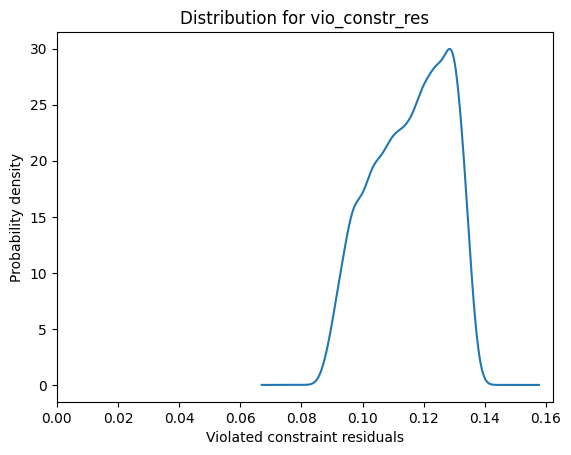

In [8]:
# Try to analyse all outputs variables: produces a linalg error
# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["vio_constr_res"])

# Get its distribution
dist = results.get_distribution(qoi="vio_constr_res")

# Locations for density function to be evaluated
# (This is taken from easyvvuq's fusion tutorial)
x = np.linspace(dist.lower[0], dist.upper[0], num=1000)
pdf = dist.pdf(x)

# Plot
ax = sns.lineplot(x=x, y=pdf, markers=True)
ax.set_title("Distribution for vio_constr_res")
ax.set_xlabel("Violated constraint residuals")
ax.set_ylabel("Probability density")
ax.set_xlim([0.0, None])

### Distribution of individual constraint violations

Text(0, 0.5, 'Probability density')

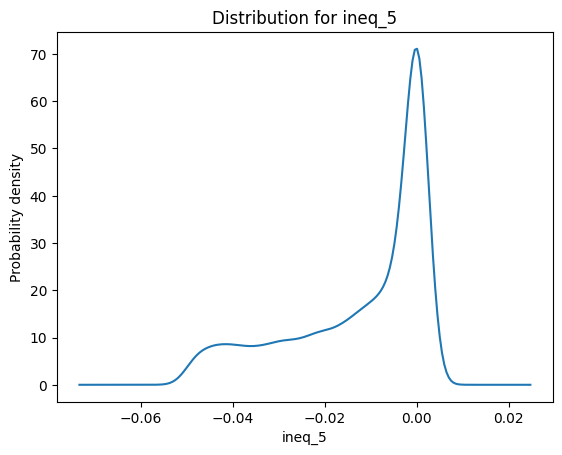

In [9]:
# Try to analyse all outputs variables: produces a linalg error
# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["ineq_5"])

# Get its distribution
dist = results.get_distribution(qoi="ineq_5")

# Locations for density function to be evaluated
# (This is taken from easyvvuq's fusion tutorial)
x = np.linspace(dist.lower[0], dist.upper[0], num=200)
pdf = dist.pdf(x)

# Plot
ax = sns.lineplot(x=x, y=pdf, markers=True)
ax.set_title("Distribution for ineq_5")
ax.set_xlabel("ineq_5")
ax.set_ylabel("Probability density")

### Objective function

Text(0, 0.5, 'Probability density')

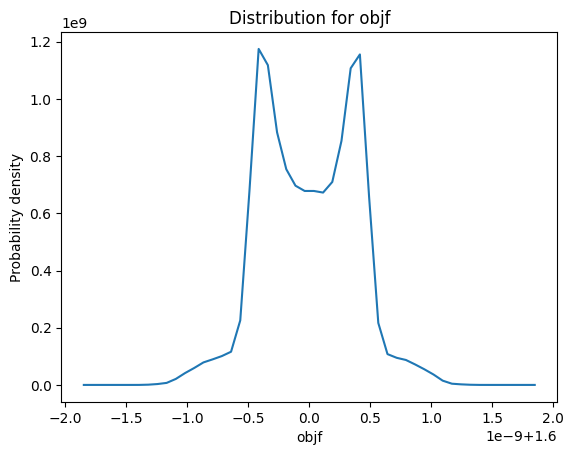

In [10]:
# Try to analyse all outputs variables: produces a linalg error
# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["objf"])

# Get its distribution
dist = results.get_distribution(qoi="objf")

# Locations for density function to be evaluated
# (This is taken from easyvvuq's fusion tutorial)
x = np.linspace(dist.lower[0], dist.upper[0])
pdf = dist.pdf(x)

# Plot
ax = sns.lineplot(x=x, y=pdf, markers=True)
ax.set_title("Distribution for objf")
ax.set_xlabel("objf")
ax.set_ylabel("Probability density")

PDF for `vio_constr_res`. Appears right from looking at the EasyVVUQ tutorial (fusion Dask).

### Sobol indices: violated constraint residuals

Sobols for violated constraint residuals.

/home/jon/anaconda3/envs/feasibility-uq/lib/python3.10/site-packages/easyvvuq/analysis/results.py:417: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


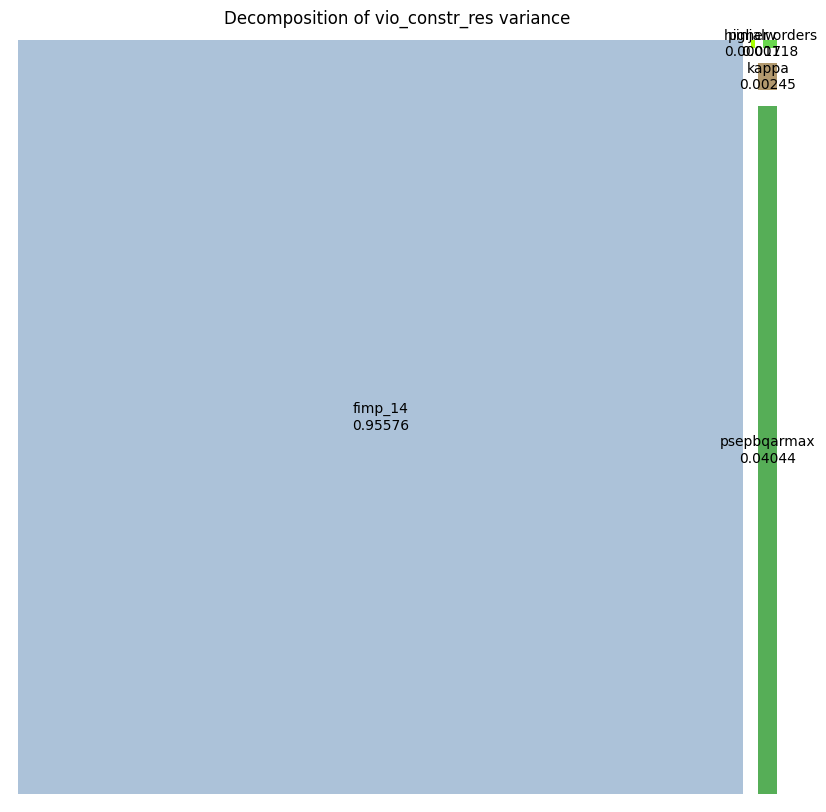

In [11]:
results = campaign.analyse(qoi_cols=["vio_constr_res"])
fig, ax = plt.subplots()
results.plot_sobols_treemap("vio_constr_res", figsize=(10, 10), ax=ax)
# ax.set_title("blah")

### Sobols for individual constraint

Interesting for discussion, but not for poster. Too much information (Sobol indices for each constraint).

/home/jon/anaconda3/envs/feasibility-uq/lib/python3.10/site-packages/easyvvuq/analysis/results.py:417: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


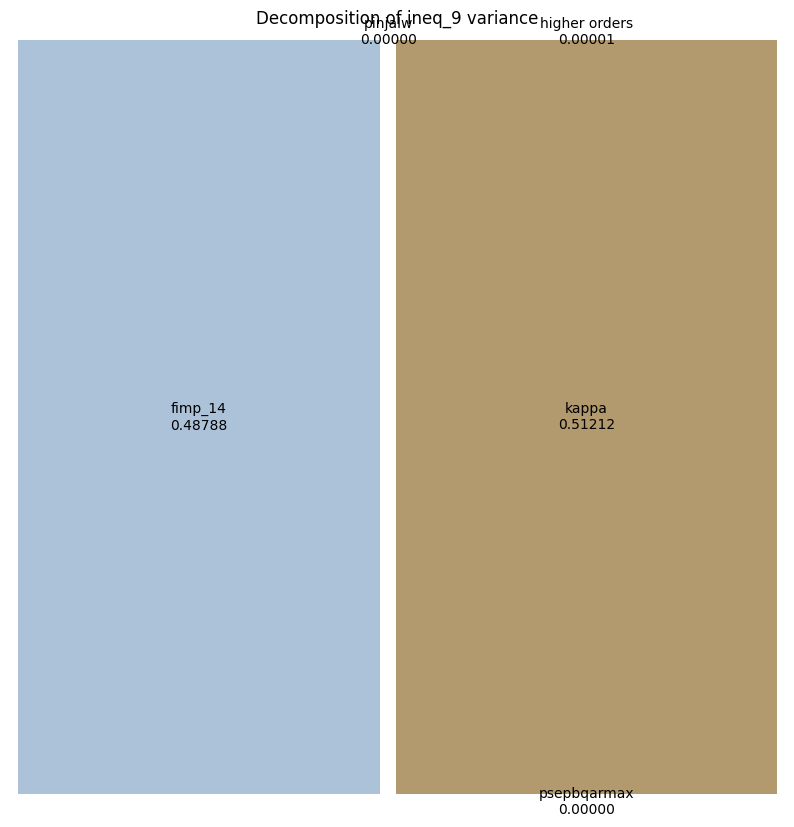

In [12]:
results = campaign.analyse(qoi_cols=["ineq_9"])
fig, ax = plt.subplots()
results.plot_sobols_treemap("ineq_9", figsize=(10, 10), ax=ax)
# ax.set_title("blah")